In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.56)
import gc

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time

print('Loading data...')

train = pd.read_csv('Google_QUEST_Q&A_Labeling_Data/train.csv')
print('\tSuccessfully loaded train!')

test = pd.read_csv('Google_QUEST_Q&A_Labeling_Data/test.csv')
print('\tSuccessfully loaded test!')


print("Train shape : "+str(train.shape))
print("Test shape  : "+str(test.shape))
print('Data was successfully loaded!\n')

Loading data...
	Successfully loaded train!
	Successfully loaded test!
Train shape : (6079, 41)
Test shape  : (476, 11)
Data was successfully loaded!

Wall time: 310 ms


In [3]:
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [4]:
test.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


In [5]:
check_null_train = train.isnull().sum()
check_null_train[check_null_train>0].sort_values(ascending=False)

Series([], dtype: int64)

In [6]:
check_null_test = test.isnull().sum()
check_null_test[check_null_test>0].sort_values(ascending=False)

Series([], dtype: int64)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
qa_id                                    6079 non-null int64
question_title                           6079 non-null object
question_body                            6079 non-null object
question_user_name                       6079 non-null object
question_user_page                       6079 non-null object
answer                                   6079 non-null object
answer_user_name                         6079 non-null object
answer_user_page                         6079 non-null object
url                                      6079 non-null object
category                                 6079 non-null object
host                                     6079 non-null object
question_asker_intent_understanding      6079 non-null float64
question_body_critical                   6079 non-null float64
question_conversational                  6079 non-null float64
question_expect_short_a

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 11 columns):
qa_id                 476 non-null int64
question_title        476 non-null object
question_body         476 non-null object
question_user_name    476 non-null object
question_user_page    476 non-null object
answer                476 non-null object
answer_user_name      476 non-null object
answer_user_page      476 non-null object
url                   476 non-null object
category              476 non-null object
host                  476 non-null object
dtypes: int64(1), object(10)
memory usage: 41.0+ KB


In [9]:
question_target_cols = ['question_asker_intent_understanding',
                        'question_body_critical',
                        'question_conversational', 
                        'question_expect_short_answer',
                        'question_fact_seeking',
                        'question_has_commonly_accepted_answer',
                        'question_interestingness_others',
                        'question_interestingness_self',
                        'question_multi_intent', 
                        'question_not_really_a_question',
                        'question_opinion_seeking',
                        'question_type_choice',
                        'question_type_compare',
                        'question_type_consequence',
                        'question_type_definition', 
                        'question_type_entity',
                        'question_type_instructions',
                        'question_type_procedure',
                        'question_type_reason_explanation',
                        'question_type_spelling',
                        'question_well_written']

answer_target_cols = ['answer_helpful',
                      'answer_level_of_information',
                      'answer_plausible',
                      'answer_relevance',
                      'answer_satisfaction',
                      'answer_type_instructions',
                      'answer_type_procedure', 
                      'answer_type_reason_explanation',
                      'answer_well_written']

all_target_cols = question_target_cols + answer_target_cols

In [10]:
def count_unique(input_data, uniques):
    for patch, uniq in zip(input_data.patches, uniques):
        height = patch.get_height()
        input_data.text(patch.get_x()+patch.get_width()/2.,
                        height + 10,
                        uniq,
                        ha="center")

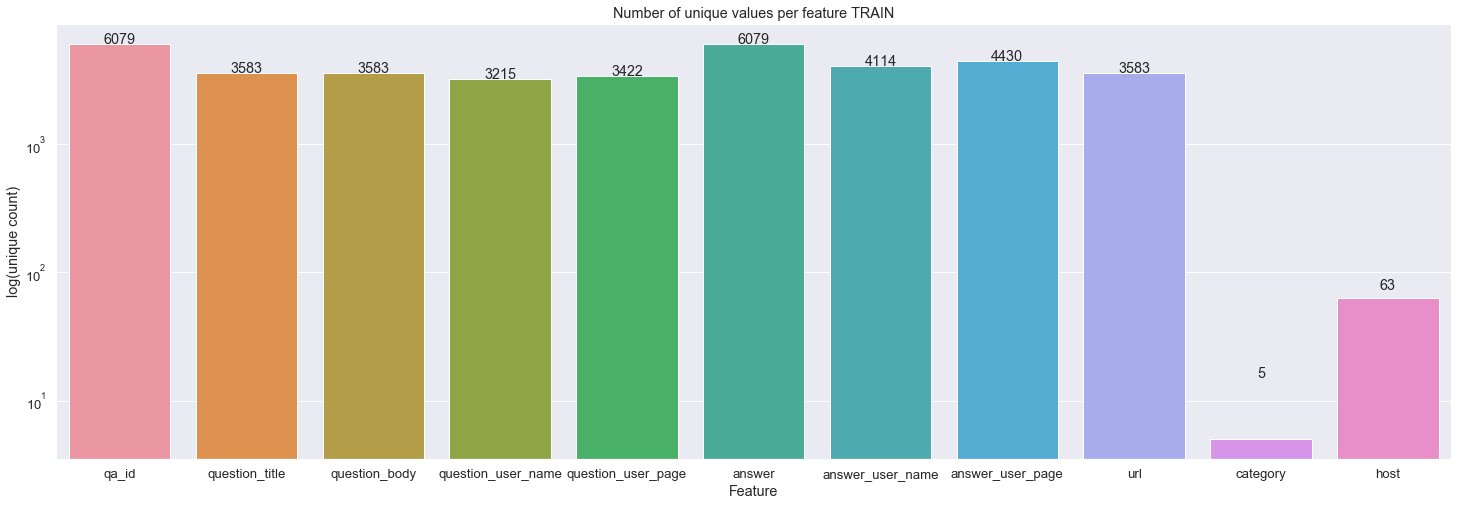

In [11]:
plt.figure(figsize=(25, 8))
#all_features = list(train.columns)
all_features = [col for col in list(train) if col not in all_target_cols]
uniques = [len(train[col].unique()) for col in all_features]
sns.set(font_scale=1.2)
all_feat = sns.barplot(all_features, uniques, log=True)
all_feat.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TRAIN')
count_unique(all_feat, uniques)

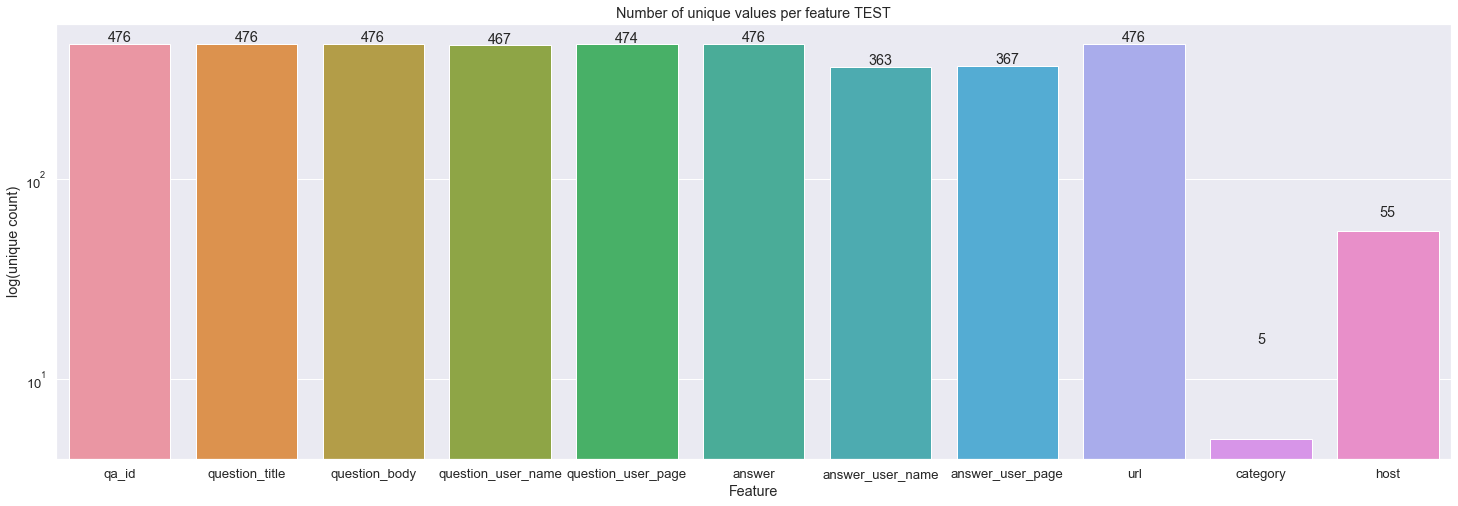

In [12]:
plt.figure(figsize=(25, 8))
all_features = list(test.columns)
uniques = [len(test[col].unique()) for col in all_features]
sns.set(font_scale=1.2)
all_feat = sns.barplot(all_features, uniques, log=True)
all_feat.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TEST')
count_unique(all_feat, uniques)

In [13]:
def GetPercentage(input_data,df):
    for patch in input_data.patches:
        height = patch.get_height()
        input_data.text(patch.get_x()+patch.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/(len(df))*100),
                        ha="center", fontsize=10)

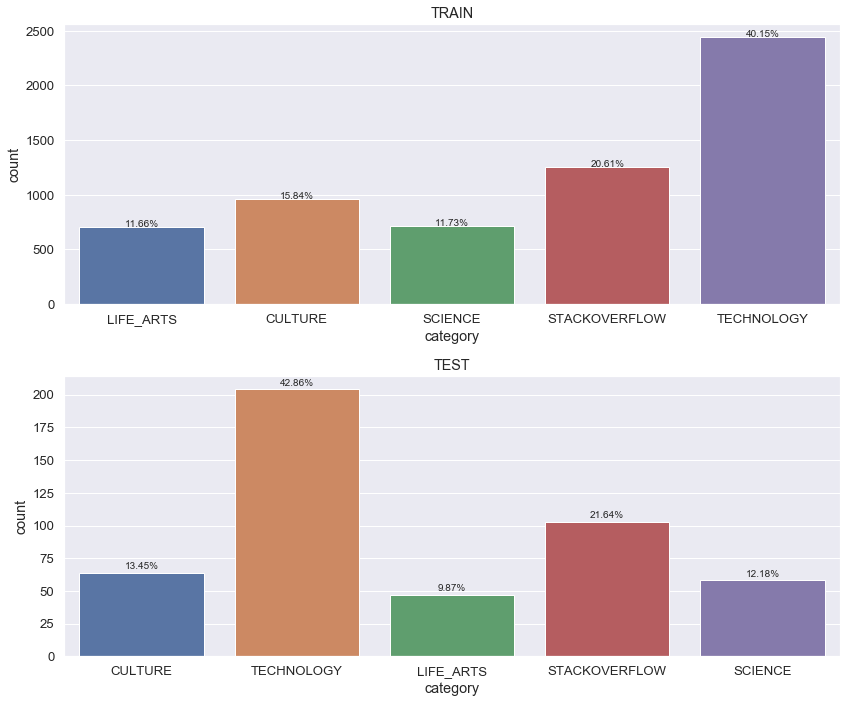

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
category = sns.countplot(x='category', data=train, ax=axes[0])
category.set(xlabel='category', ylabel='count', title='TRAIN')
GetPercentage(category,train)

category = sns.countplot(x='category', data=test, ax=axes[1])
category.set(xlabel='category', ylabel='count', title='TEST')
GetPercentage(category,test)
plt.tight_layout()

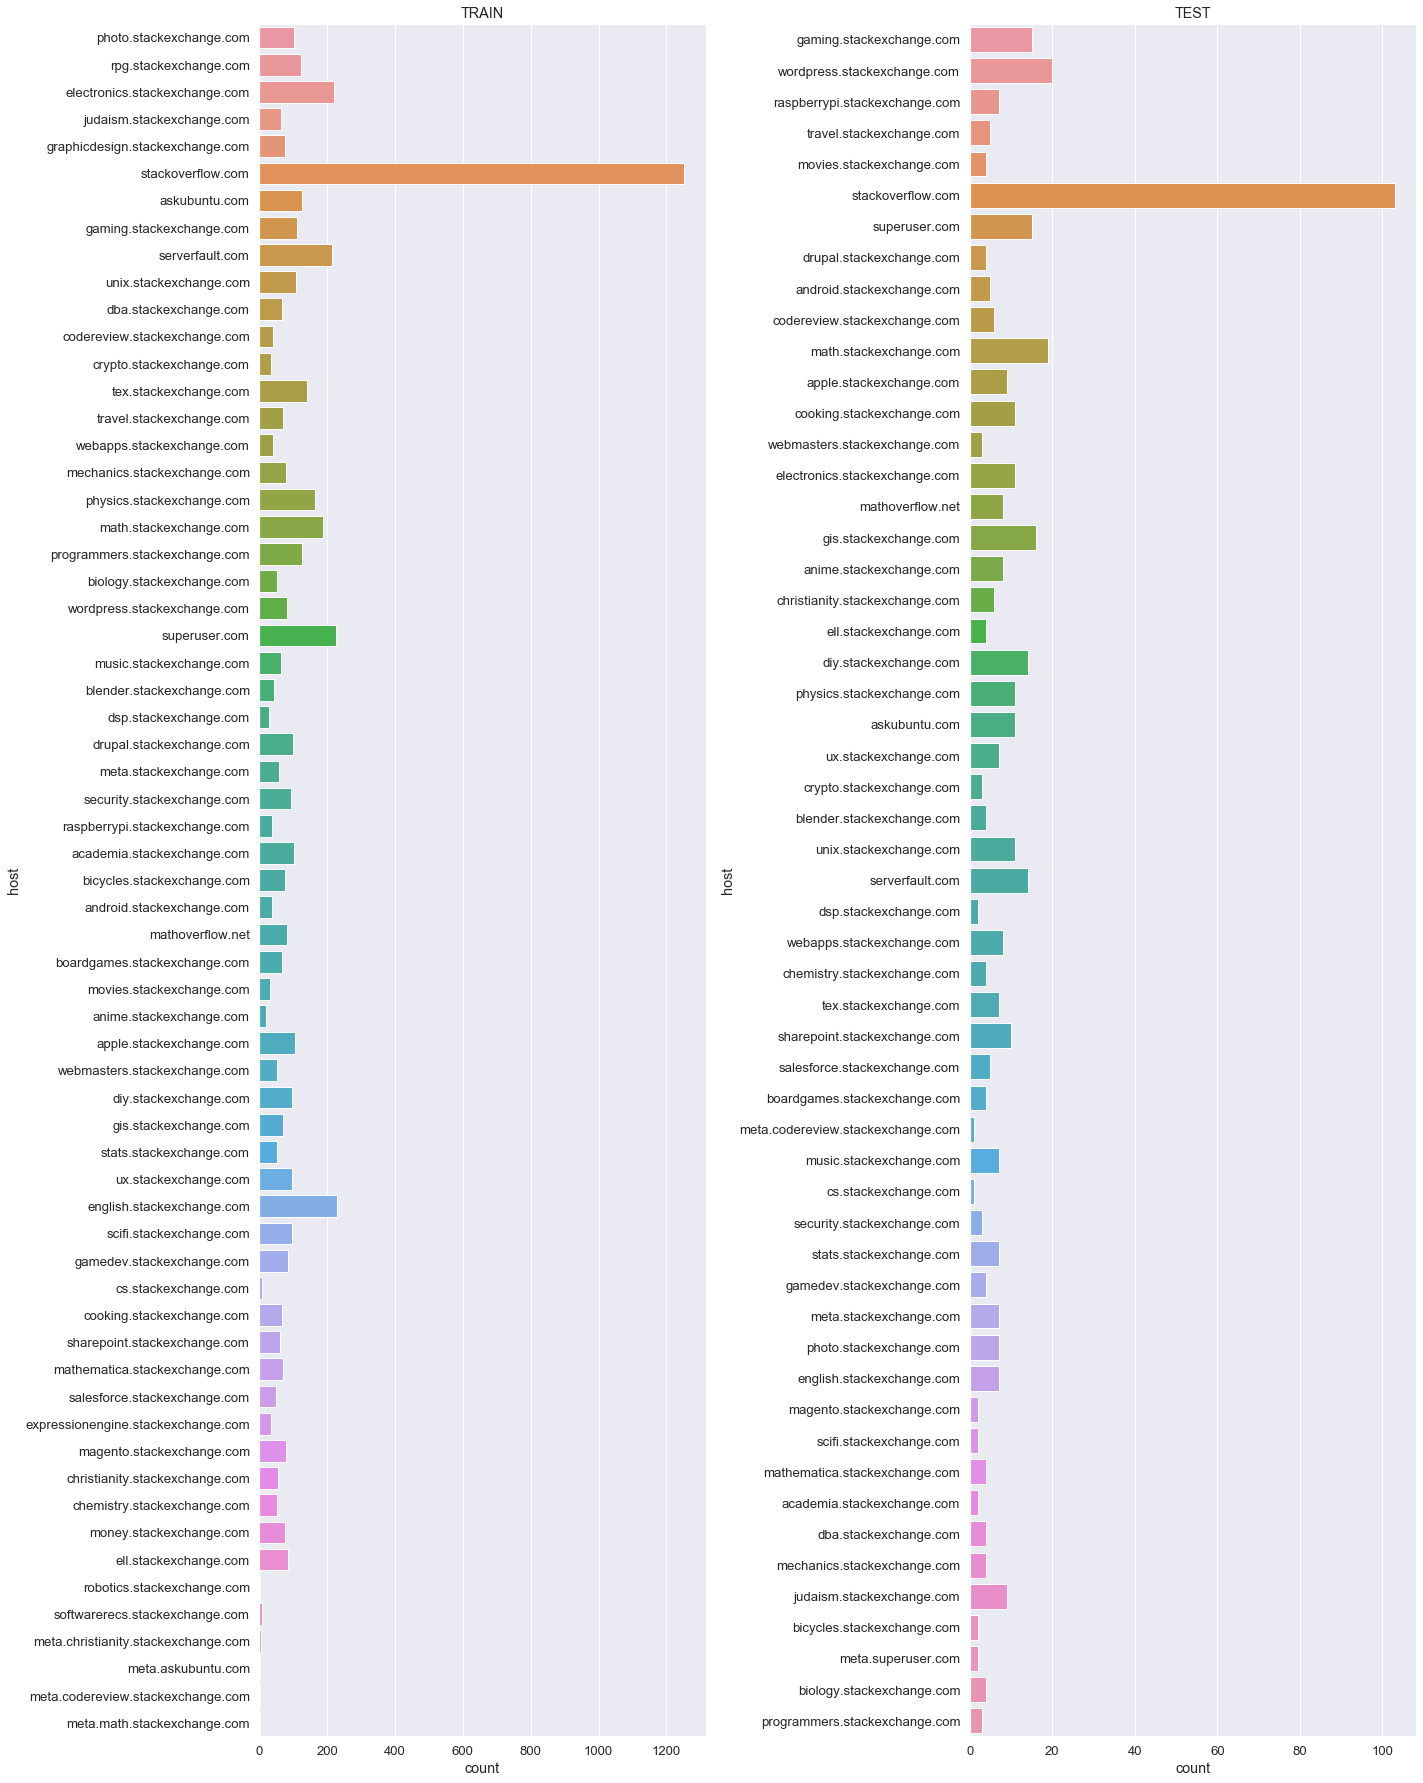

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 25))
host = sns.countplot(y='host', data=train, ax=axes[0])
host.set(xlabel='count', ylabel='host', title='TRAIN')

host = sns.countplot(y='host', data=test, ax=axes[1])
host.set(xlabel='count', ylabel='host', title='TEST')
plt.tight_layout()

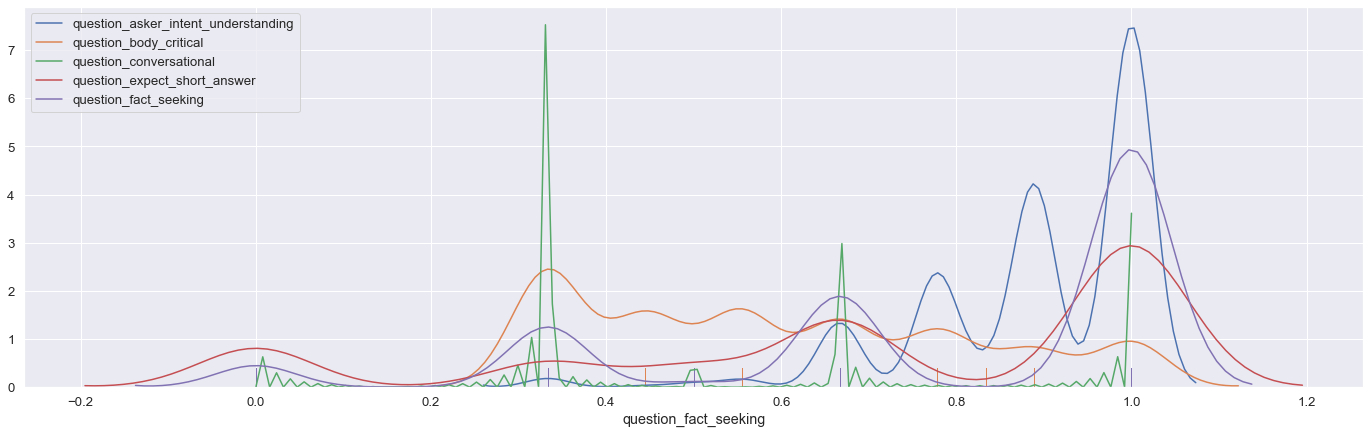

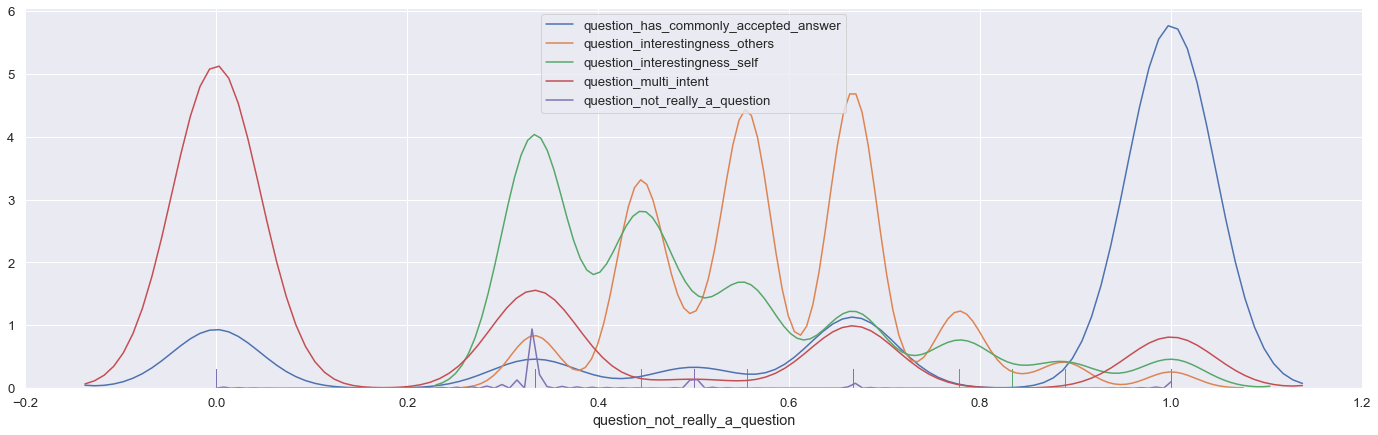

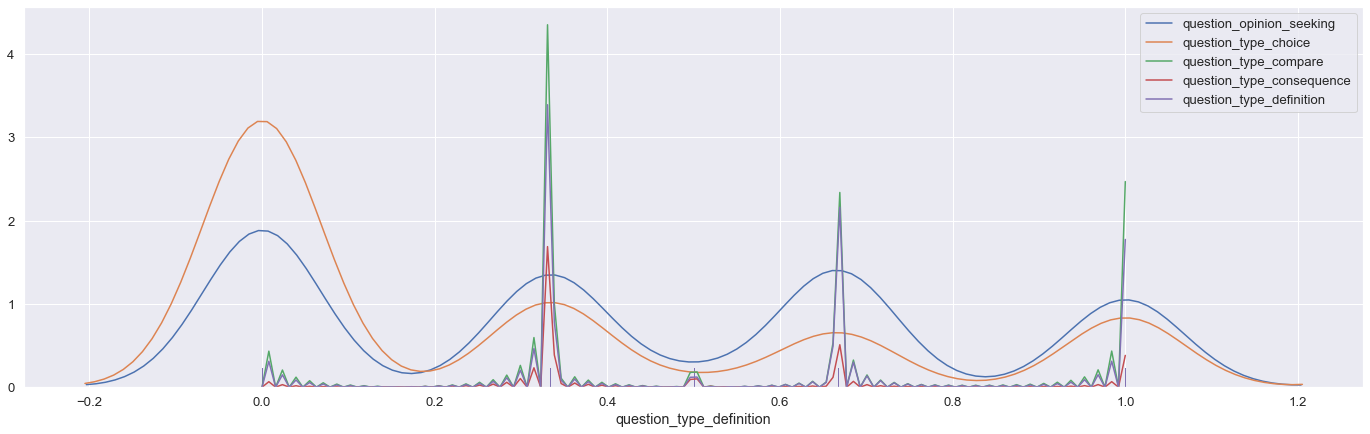

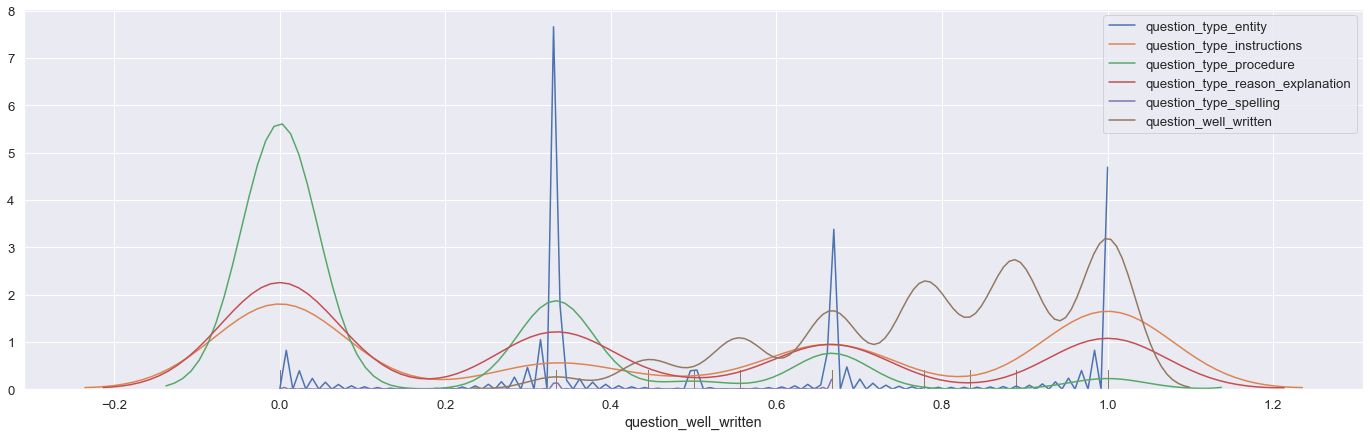

In [16]:
f = plt.subplots(figsize=(24, 7))
for col in question_target_cols[:5]:
    sns.distplot(train[col], label=col, rug=True, hist=False)
plt.show()

f = plt.subplots(figsize=(24, 7))
for col in question_target_cols[5:10]:
    sns.distplot(train[col], label=col, rug=True, hist=False)
plt.show()

f = plt.subplots(figsize=(24, 7))
for col in question_target_cols[10:15]:
    sns.distplot(train[col], label=col, rug=True, hist=False)
plt.show()

f = plt.subplots(figsize=(24, 7))
for col in question_target_cols[15:]:
    sns.distplot(train[col], label=col, rug=True, hist=False)
plt.show()

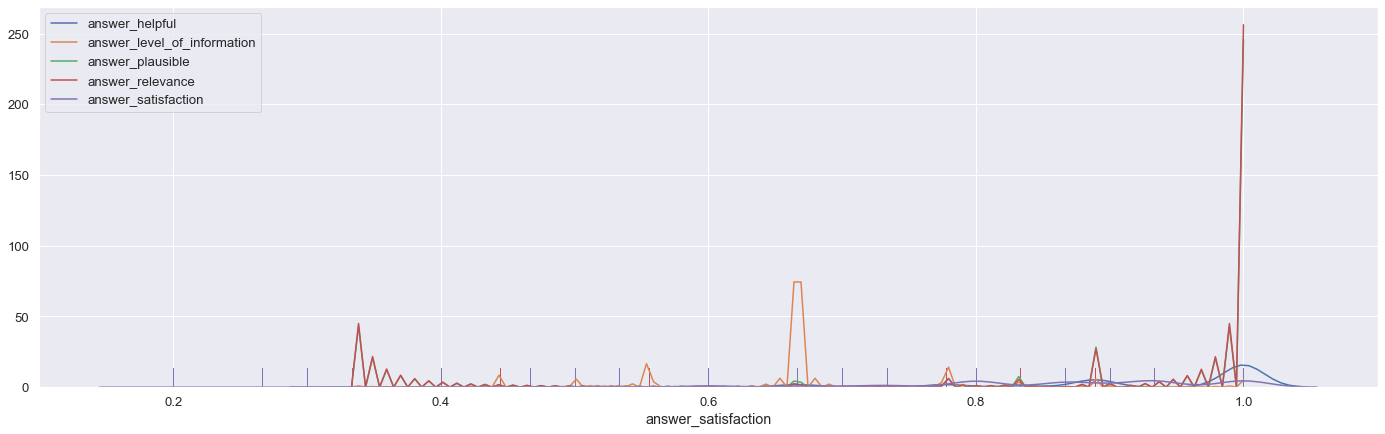

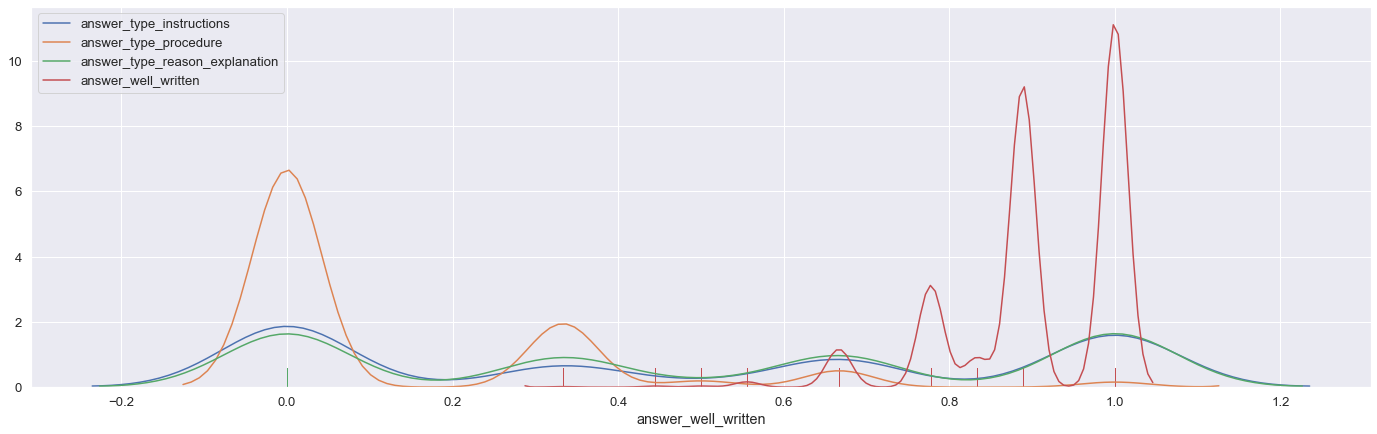

In [17]:
f = plt.subplots(figsize=(24, 7))
for col in answer_target_cols[:5]:
    sns.distplot(train[col], label=col, rug=True, hist=False)
plt.show()

f = plt.subplots(figsize=(24, 7))
for col in answer_target_cols[5:]:
    sns.distplot(train[col], label=col, rug=True, hist=False)
plt.show()

In [18]:
qtp = train[train["question_type_spelling"] > 0][["question_body", "category", "question_type_spelling", "url"]]
print(f"{len(qtp)} / {len(train)} QAs")
qtp

11 / 6079 QAs


,question_body,category,question_type_spelling,url
362,What is the correct adjective form of the word...,CULTURE,0.666667,http://english.stackexchange.com/questions/269...
700,I read a book about American English. It repor...,CULTURE,0.333333,http://english.stackexchange.com/questions/333...
930,"Is there a rule, or rules, for how to pronounc...",CULTURE,0.666667,http://ell.stackexchange.com/questions/58002/i...
1259,A friend said that epitome is pronounced as ep...,CULTURE,0.333333,http://english.stackexchange.com/questions/220...
1561,I came across akimbo and askance today and won...,CULTURE,0.333333,http://english.stackexchange.com/questions/111...
1628,A friend said that epitome is pronounced as ep...,CULTURE,0.666667,http://english.stackexchange.com/questions/220...
1646,How many syllables are in the name Coleridge -...,CULTURE,0.333333,http://english.stackexchange.com/questions/307...
2591,I read a book about American English. It repor...,CULTURE,0.333333,http://english.stackexchange.com/questions/333...
3323,In Monty Python's Dead parrot sketch when John...,CULTURE,0.333333,http://ell.stackexchange.com/questions/14327/i...
3579,"Do Americans pronounce ""Ellen"" and ""Alan"" in t...",CULTURE,0.666667,http://english.stackexchange.com/questions/642...


In [30]:
indexs = []
for i in range(len(train)):
    if train.iloc[i, 8] in qtp["url"].values:
        indexs.append(i)
output = pd.DataFrame(train.iloc[indexs].sort_values("url")[["qa_id", "question_body", "answer", "question_type_spelling"]])

In [31]:
output.head()

,qa_id,question_body,answer,question_type_spelling
2766,4409,In Monty Python's Dead parrot sketch when John...,Talk about the importance of context! When I r...,0.000000
3323,5305,In Monty Python's Dead parrot sketch when John...,Here is the dialogue I found. (source) In the ...,0.333333
930,1468,"Is there a rule, or rules, for how to pronounc...","There isn't a rule, really. English is known f...",0.666667
5199,8257,"Is there a rule, or rules, for how to pronounc...",There are at least five ways to pronounce ough...,0.000000
1561,2449,I came across akimbo and askance today and won...,This is actually a matter of general reference...,0.333333


In [32]:
output.to_csv('hardtarget.csv', index=False)

In [35]:
def count_spelling_feature(text):
    symbols = ["ʊ", "ə", "ɹ", "ɪ", "ʒ", "ɑ", "ʌ", "ɔ", "æ", "ː", "ɜ",  "adjective", "pronounce"]
    count = 0
    for s in symbols:
        count += text.count(s)
    return count

output = pd.DataFrame(train[train["question_body"].apply(lambda x: count_spelling_feature(x)) > 0][["url", "question_body", "answer","category","question_type_spelling"]])

In [36]:
output.head()

,url,question_body,answer,category,question_type_spelling
171,http://english.stackexchange.com/questions/188...,"For example, \nStarting a new business require...","In terms of relationships, the word for “requi...",CULTURE,0.000000
362,http://english.stackexchange.com/questions/269...,What is the correct adjective form of the word...,This is starting to become a bit of a hoary ol...,CULTURE,0.666667
378,http://wordpress.stackexchange.com/questions/1...,I have some danish users that uses special cha...,Are you creating your users via regular means ...,TECHNOLOGY,0.000000
592,http://english.stackexchange.com/questions/269...,What is the correct adjective form of the word...,"Languages evolve, Americans spell and pronounc...",CULTURE,0.000000
700,http://english.stackexchange.com/questions/333...,I read a book about American English. It repor...,The /ɔ/ as described by Wikipedia is an unelis...,CULTURE,0.333333


In [37]:
output[output["category"]!='TECHNOLOGY']

,url,question_body,answer,category,question_type_spelling
171,http://english.stackexchange.com/questions/188...,"For example, \nStarting a new business require...","In terms of relationships, the word for “requi...",CULTURE,0.000000
362,http://english.stackexchange.com/questions/269...,What is the correct adjective form of the word...,This is starting to become a bit of a hoary ol...,CULTURE,0.666667
592,http://english.stackexchange.com/questions/269...,What is the correct adjective form of the word...,"Languages evolve, Americans spell and pronounc...",CULTURE,0.000000
700,http://english.stackexchange.com/questions/333...,I read a book about American English. It repor...,The /ɔ/ as described by Wikipedia is an unelis...,CULTURE,0.333333
930,http://ell.stackexchange.com/questions/58002/i...,"Is there a rule, or rules, for how to pronounc...","There isn't a rule, really. English is known f...",CULTURE,0.666667
1061,http://english.stackexchange.com/questions/936...,"Most of the usage of ""matter-of-factly"" that I...","The issue with the second usage is that ""matte...",CULTURE,0.000000
1259,http://english.stackexchange.com/questions/220...,A friend said that epitome is pronounced as ep...,"As reported by the NOAD and the OED, Epitome i...",CULTURE,0.333333
1480,http://english.stackexchange.com/questions/936...,"Most of the usage of ""matter-of-factly"" that I...","I've never heard it, and BYU's COCA has but on...",CULTURE,0.000000
1628,http://english.stackexchange.com/questions/220...,A friend said that epitome is pronounced as ep...,Epitome comes from Greek but it was introduced...,CULTURE,0.666667
1646,http://english.stackexchange.com/questions/307...,How many syllables are in the name Coleridge -...,"From Coleridge himself, we have\n\n\n Parry s...",CULTURE,0.333333


In [45]:
sub = pd.read_csv('Google_QUEST_Q&A_Labeling_Data/sample_submission.csv')
temp_test = pd.merge(test, sub, on = 'qa_id', how = 'left')
temp_test.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,...,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,...,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074


In [46]:
n=test['url'].apply(lambda x:(('ell.stackexchange.com' in x) or ('english.stackexchange.com' in x))).tolist()
spelling=[]
for x in n:
    if x:
        spelling.append(1.0)
    else:
        spelling.append(0.)
        
temp_test['question_type_spelling']=spelling

In [48]:
temp_test['question_type_spelling'] = np.where(temp_test['question_type_spelling']==0., 0., sub['question_type_spelling'])

In [51]:
print(temp_test['question_type_spelling'].value_counts())

0.00000    465
0.09025      1
0.79765      1
0.75280      1
0.23543      1
0.25224      1
0.63705      1
0.45824      1
0.41452      1
0.90555      1
0.77971      1
0.38621      1
Name: question_type_spelling, dtype: int64


In [53]:
qtp = train[train["question_not_really_a_question"] > 0][["question_body", "category", "question_not_really_a_question", "url"]]
print(f"{len(qtp)} / {len(train)} QAs")
qtp

66 / 6079 QAs


,question_body,category,question_not_really_a_question,url
121,The new Facebook Page Manager app (in combinat...,TECHNOLOGY,0.333333,http://webapps.stackexchange.com/questions/442...
139,I am facing this issue while submitting the ap...,STACKOVERFLOW,0.333333,http://stackoverflow.com/questions/18785321/ap...
220,I ran into this question on Stack Overflow. It...,TECHNOLOGY,0.333333,http://codereview.stackexchange.com/questions/...
336,I faced the error mentioned in the title when ...,STACKOVERFLOW,0.333333,http://stackoverflow.com/questions/19391293/c-...
380,Im trying to use Isotope(http://isotope.metafi...,TECHNOLOGY,0.500000,http://wordpress.stackexchange.com/questions/4...
...,...,...,...,...
5777,Jesus said there will be no marriage in heaven...,CULTURE,0.333333,http://christianity.stackexchange.com/question...
5822,I'm really having trouble tracking down some b...,TECHNOLOGY,0.333333,http://dba.stackexchange.com/questions/41709/s...
5854,"In a lot of places I interviewed recently, I h...",TECHNOLOGY,0.333333,http://gamedev.stackexchange.com/questions/865...
5904,Good day stack overflow.\n\nI'm a noob in usin...,STACKOVERFLOW,0.333333,http://stackoverflow.com/questions/12493931/ch...


In [54]:
indexs = []
for i in range(len(train)):
    if train.iloc[i, 8] in qtp["url"].values:
        indexs.append(i)
output = pd.DataFrame(train.iloc[indexs].sort_values("url")[["qa_id", "question_body", "answer", "question_not_really_a_question"]])

In [56]:
output.to_csv('hardtarget2.csv', index=False)